___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [ ]:
# Importing the libraries for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import interact
%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("darkgrid")
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [ ]:
np.__version__

In [ ]:
!pip install livelossplot --quiet

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score, f1_score, precision_recall_curve, average_precision_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from livelossplot import PlotLossesKerasTF

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
data = pd.read_csv('/content/Churn_Modelling (1).csv', index_col='RowNumber')
data.head()

In [ ]:
df = data.copy()

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
len(df)

In [ ]:
df.duplicated().sum()/len(df)*100

In [ ]:
df.describe().T 

In [ ]:
df.describe(include='O').T

In [ ]:
#we don't need customer Id or Surname
df.drop(['CustomerId','Surname'], axis = 1, inplace=True)

In [ ]:
df.hist(figsize=(15, 12), bins=25);

Target "Exited"

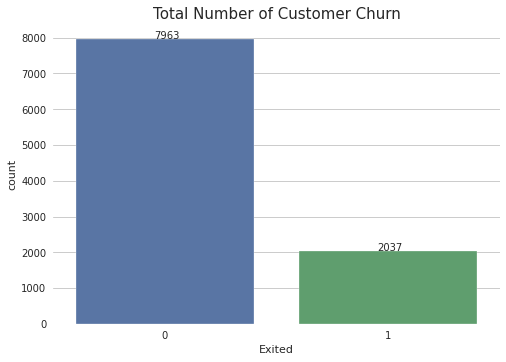

In [ ]:
fig, ax = plt.subplots()

ax = sns.countplot(data=df, x="Exited")
ax.set_title("Total Number of Customer Churn", fontsize=15)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.35, p.get_height() * 1.0));    

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize=(10, 8))

ax.pie(x=df.Exited.value_counts(), 
       labels=['Stayed', 'Left'], 
       autopct='%.1f%%',
       explode=(0, 0.1),
       textprops={'fontsize': 14},
       shadow=True,
       startangle=45
       )

ax.axis('equal')

plt.title("Percentage of Customer Churn", fontdict={'fontsize': 20})
plt.show()

Exited by Gender

In [ ]:
df.columns

In [ ]:
sns.set_style("whitegrid")
plt.style.use('seaborn')

p = sns.catplot(
    data=df, x="Exited" , col= "Gender",
    kind="count", height=4, aspect=1, hue =None
);

p.fig.suptitle("Total Number of Customer Churn by Gender", y=1.02);
# for bars in ax.containers:
#         ax.bar_label(bars, fmt='%.f', size=12)

Exited by Age

In [ ]:
sns.set_style("whitegrid")
sns.histplot(x="Age", data=df);

In [ ]:
sns.histplot(x='Age', hue='Exited', data=df, alpha=0.5);

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(y='Age', x='Exited', data=df);

Exited by Estimated Salary

In [ ]:
sns.boxplot(data = df ,x="Exited",y="EstimatedSalary");

Exited by Credit Score

In [ ]:
sns.histplot(x='CreditScore',data=df, hue='Exited');

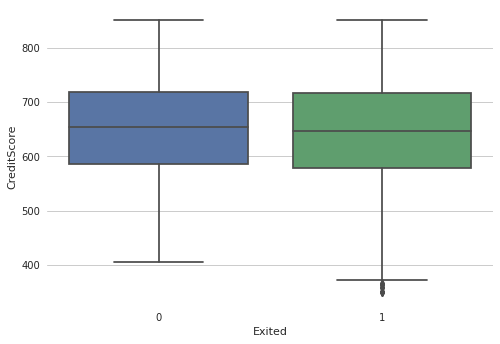

In [ ]:
sns.boxplot(y='CreditScore', x='Exited', data=df)

Geography

In [ ]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df2 = df.copy()
df2.tail(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
9998,709,France,Female,36,7,0.0,1,0,1,42085.6,1
9999,772,Germany,Male,42,3,75075.3,2,1,0,92888.5,1
10000,792,France,Female,28,4,130142.8,1,1,0,38190.8,0


Exited by NumofProducts

In [ ]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

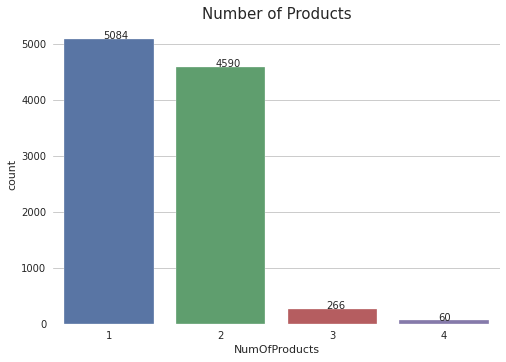

In [ ]:
fig, ax = plt.subplots()

ax = sns.countplot(data=df, x='NumOfProducts')
ax.set_title("Number of Products", fontsize=15)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.35, p.get_height() * 1.0)); 

In [ ]:
df.groupby('NumOfProducts')['Exited'].sum()

NumOfProducts
1    1409
2     348
3     220
4      60
Name: Exited, dtype: int64

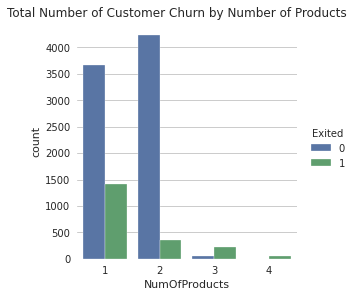

In [ ]:
p = sns.catplot(
    data=df, x="NumOfProducts" , kind="count", height=4, aspect=1, hue ="Exited"
);

p.fig.suptitle("Total Number of Customer Churn by Number of Products", y=1.02);
# for bars in ax.containers:
#         ax.bar_label(bars, fmt='%.f', size=12)

Exited by Is a Active Member

In [ ]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [ ]:
df.groupby('IsActiveMember')['Exited'].sum()

IsActiveMember
0    1302
1     735
Name: Exited, dtype: int64

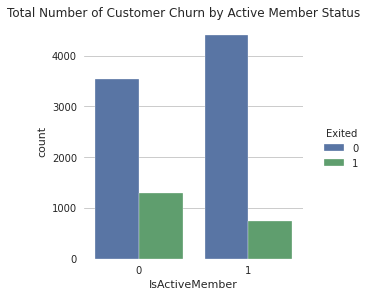

In [ ]:
p = sns.catplot(
    data=df, x="IsActiveMember" , kind="count", height=4, aspect=1, hue ="Exited"
);

p.fig.suptitle("Total Number of Customer Churn by Active Member Status", y=1.02);
# for bars in ax.containers:
#         ax.bar_label(bars, fmt='%.f', size=12)

Correlation with Exited

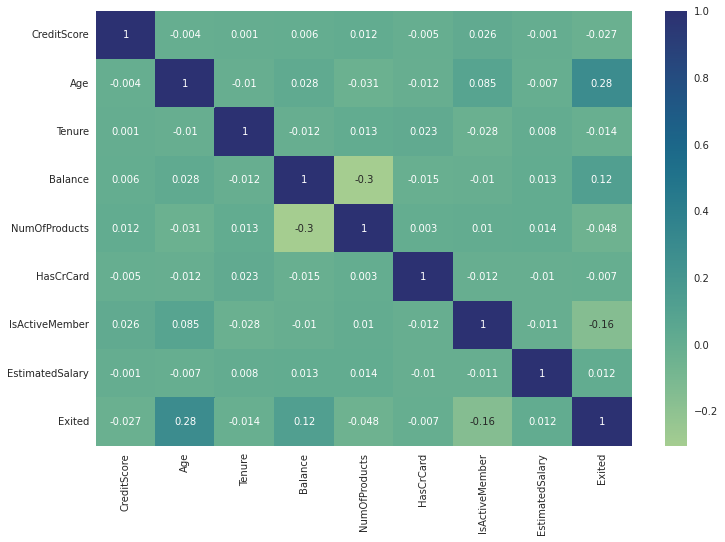

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().round(3), annot=True, cmap='crest');

In [ ]:
df.corr()[['Exited']].sort_values(by='Exited', ascending=False)

,Exited
Exited,1.0
Age,0.3
Balance,0.1
EstimatedSalary,0.0
HasCrCard,-0.0
Tenure,-0.0
CreditScore,-0.0
NumOfProducts,-0.0
IsActiveMember,-0.2


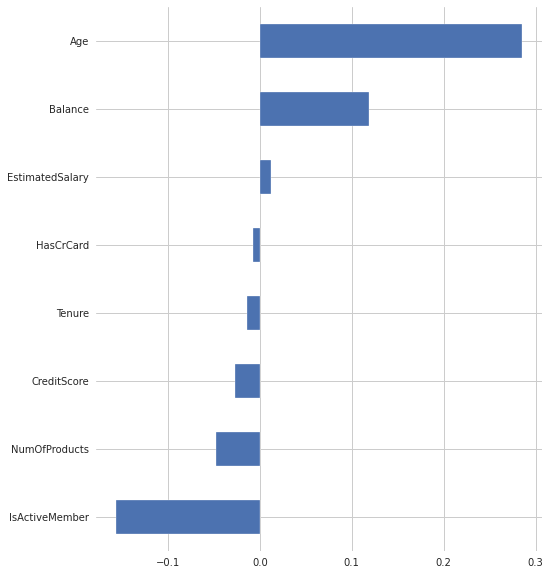

In [ ]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");

In [ ]:
#The is the last step before starting the processing before the model
#Change value in country column
df.rename(columns = {'Exited':'Churn'}, inplace = True)
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.0,1,1,1,101348.9,1
2,608,Spain,Female,41,1,83807.9,1,0,1,112542.6,0


In [ ]:
df.shape

(10000, 11)

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')

In [ ]:
#Change value in country column
# df['country'] = df['Geography'].replace(['Germany'],'0')
# df['country'] = df['Geography'].replace(['France'],'1')
# df['country'] = df['Geography'].replace(['Spain'],'2')
#Change value in gender column
# df['Gender'] = df['Gender'].replace(['Female'],'0')
# df['Gender'] = df['Gender'].replace(['Male'],'1')

# Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=42)

In [ ]:
X_train.shape

(8500, 10)

In [ ]:
X_test.shape

(1500, 10)

In [ ]:
cat_columns = X_train.select_dtypes(include=['object', 'bool']).columns
OHE = OneHotEncoder(categories="auto",sparse=False, handle_unknown="ignore")

In [ ]:
transformers = [('cat', OHE, cat_columns)]

column_trans = ColumnTransformer(transformers=transformers,remainder='passthrough')

In [ ]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [ ]:
tf.__version__

In [ ]:
X_train.shape

(8500, 13)

In [ ]:
tf.random.set_seed(42) 

model = Sequential() 

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1])) 
model.add(Dense(8, activation="relu"))  
model.add(Dense(1, activation="sigmoid"))  
opt = Adam(lr=0.001) 
model.compile(optimizer=opt, loss="binary_crossentropy",metrics=["Recall"]) 

In [90]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 400, verbose=1)

Epoch 1/400
240/240 [==============================] - 1s 4ms/step - loss: 0.3175 - recall: 0.5407 - val_loss: 0.3390 - val_recall: 0.5235
Epoch 2/400
240/240 [==============================] - 1s 3ms/step - loss: 0.3121 - recall: 0.5240 - val_loss: 0.3404 - val_recall: 0.5000
Epoch 3/400
240/240 [==============================] - 1s 4ms/step - loss: 0.3130 - recall: 0.5189 - val_loss: 0.3391 - val_recall: 0.5353
Epoch 4/400
240/240 [==============================] - 1s 4ms/step - loss: 0.3121 - recall: 0.5227 - val_loss: 0.3388 - val_recall: 0.5176
Epoch 5/400
240/240 [==============================] - 1s 4ms/step - loss: 0.3119 - recall: 0.5221 - val_loss: 0.3399 - val_recall: 0.5294
Epoch 6/400
240/240 [==============================] - 1s 4ms/step - loss: 0.3121 - recall: 0.5227 - val_loss: 0.3401 - val_recall: 0.5294
Epoch 7/400
240/240 [==============================] - 1s 3ms/step - loss: 0.3123 - recall: 0.5189 - val_loss: 0.3376 - val_recall: 0.5294
Epoch 8/400
240/240 [======

In [91]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                224       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [92]:
dense = 13 * 16 + 16
dense

224

In [93]:
model.weights

[<tf.Variable 'dense_7/kernel:0' shape=(13, 16) dtype=float32, numpy=
 array([[-3.39395776e-02, -5.36671877e-02,  1.92341283e-01,
         -4.50117022e-01, -3.46248806e-01, -1.66825205e-01,
         -6.93603158e-02,  1.37275016e+00, -7.37599492e-01,
         -7.69953907e-01,  3.53681713e-01, -1.90826692e-02,
         -1.18580237e-01,  7.49929920e-02,  4.91891243e-02,
          8.62431526e-02],
        [-4.64267850e-01,  1.93139315e-02, -6.20690733e-02,
         -5.69523513e-01,  1.91821337e-01, -8.72202963e-02,
         -2.17693999e-01, -2.74449289e-01,  2.81732026e-02,
         -3.62039745e-01,  2.72537380e-01,  8.06662068e-02,
         -1.32525861e-02, -2.18916684e-01,  9.83628929e-01,
          2.82606244e-01],
        [ 4.35555905e-01,  2.39614248e-02,  2.86841691e-02,
         -5.18879220e-02,  3.78561795e-01,  3.11114714e-02,
         -1.82035267e-01,  7.66963243e-01,  1.50671422e-01,
          9.11763012e-02,  6.62087917e-01, -2.83732742e-01,
          2.76929617e-01, -3.6549988

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [94]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.3,0.5,0.3,0.5
1,0.3,0.5,0.3,0.5
2,0.3,0.5,0.3,0.5
3,0.3,0.5,0.3,0.5
4,0.3,0.5,0.3,0.5


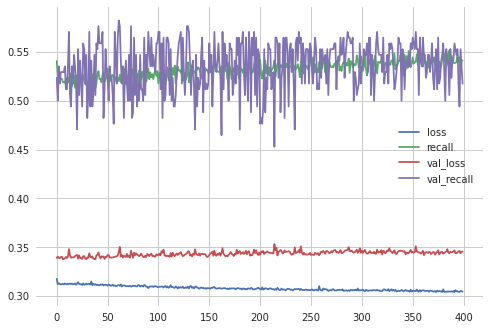

In [95]:
loss_df.plot()
plt.show()

In [96]:
model.evaluate(X_test, y_test, verbose=0)

[0.35992521047592163, 0.4771241843700409]

In [97]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.35992521047592163
recall:  0.4771241843700409


In [98]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 1ms/step
[[1133   61]
 [ 160  146]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1194
           1       0.71      0.48      0.57       306

    accuracy                           0.85      1500
   macro avg       0.79      0.71      0.74      1500
weighted avg       0.84      0.85      0.84      1500



Model perfomred poorly. Underfitting associated with low scores for recall and f1_score. 

47/47 [==============================] - 0s 1ms/step


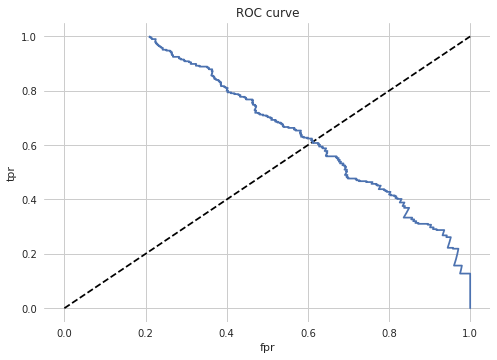

In [100]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show();

In [101]:
non_weighted_f1 = f1_score(y_test, y_pred)
non_weighted_recall = recall_score(y_test, y_pred)

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [102]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [103]:
class_weights = class_weight.compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)

In [104]:
class_weights

array([0.62786231, 2.45522819])

In [105]:
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278623134879598, 1: 2.455228191796649}

In [106]:
model.fit(X_train, y_train, class_weight=class_weights,validation_split = 0.1, batch_size = 32, epochs = 400, verbose=1 )

Epoch 1/400
240/240 [==============================] - 2s 5ms/step - loss: 0.6741 - recall: 0.5432 - val_loss: 0.6552 - val_recall: 0.6000
Epoch 2/400
240/240 [==============================] - 1s 4ms/step - loss: 0.6319 - recall: 0.6630 - val_loss: 0.6335 - val_recall: 0.6235
Epoch 3/400
240/240 [==============================] - 1s 4ms/step - loss: 0.6103 - recall: 0.6765 - val_loss: 0.6268 - val_recall: 0.6412
Epoch 4/400
240/240 [==============================] - 1s 4ms/step - loss: 0.5935 - recall: 0.6912 - val_loss: 0.5862 - val_recall: 0.5824
Epoch 5/400
240/240 [==============================] - 1s 4ms/step - loss: 0.5787 - recall: 0.6848 - val_loss: 0.5686 - val_recall: 0.5941
Epoch 6/400
240/240 [==============================] - 1s 4ms/step - loss: 0.5628 - recall: 0.7053 - val_loss: 0.5809 - val_recall: 0.6529
Epoch 7/400
240/240 [==============================] - 1s 4ms/step - loss: 0.5469 - recall: 0.7258 - val_loss: 0.5687 - val_recall: 0.7000
Epoch 8/400
240/240 [======

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

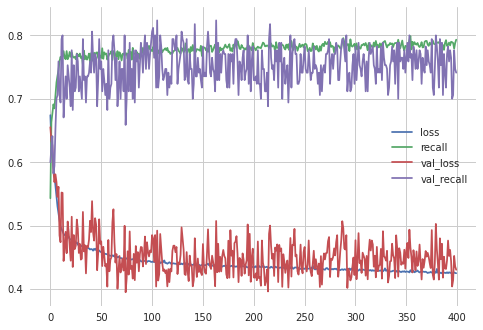

In [107]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [88]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.4435964822769165
recall:  0.7352941036224365


In [ ]:
loss:  0.35992521047592163
recall:  0.4771241843700409

Improved recall scores but precsion decrease and therfore the f1 scored decreased as well, the loss scored increase. More model tuning needed 

In [109]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 2ms/step
[[948 246]
 [ 79 227]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1194
           1       0.48      0.74      0.58       306

    accuracy                           0.78      1500
   macro avg       0.70      0.77      0.72      1500
weighted avg       0.83      0.78      0.80      1500



Recall score improved

47/47 [==============================] - 0s 1ms/step


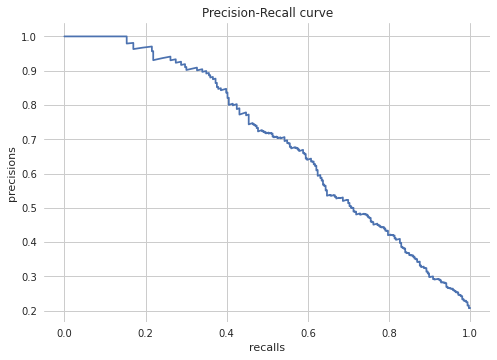

In [110]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [111]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

### Add Dropout Layer

In [113]:
from tensorflow.keras.layers import Dropout

In [115]:
X_train.shape

(8500, 13)

In [114]:
tf.random.set_seed(101)

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(24, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss ="binary_crossentropy", metrics=['Recall'])

In [117]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.1,
          batch_size=32,
          epochs=400,
          verbose=1)

Epoch 1/400
240/240 [==============================] - 1s 4ms/step - loss: 0.4837 - recall: 6.4062e-04 - val_loss: 0.4639 - val_recall: 0.0000e+00
Epoch 2/400
240/240 [==============================] - 1s 4ms/step - loss: 0.4707 - recall: 0.0045 - val_loss: 0.4566 - val_recall: 0.0000e+00
Epoch 3/400
240/240 [==============================] - 1s 5ms/step - loss: 0.4694 - recall: 0.0218 - val_loss: 0.4538 - val_recall: 0.0000e+00
Epoch 4/400
240/240 [==============================] - 2s 6ms/step - loss: 0.4602 - recall: 0.0750 - val_loss: 0.4462 - val_recall: 0.0000e+00
Epoch 5/400
240/240 [==============================] - 1s 4ms/step - loss: 0.4533 - recall: 0.0839 - val_loss: 0.4451 - val_recall: 0.0647
Epoch 6/400
240/240 [==============================] - 1s 4ms/step - loss: 0.4484 - recall: 0.1211 - val_loss: 0.4376 - val_recall: 0.0765
Epoch 7/400
240/240 [==============================] - 1s 4ms/step - loss: 0.4445 - recall: 0.1602 - val_loss: 0.4339 - val_recall: 0.1294
Epoch 8

In [118]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, class_weight=class_weights, epochs = 400, verbose = 1)

Epoch 1/400
240/240 [==============================] - 4s 4ms/step - loss: 0.4945 - recall: 0.6573 - val_loss: 0.4295 - val_recall: 0.7235
Epoch 2/400
240/240 [==============================] - 1s 4ms/step - loss: 0.4681 - recall: 0.7316 - val_loss: 0.4088 - val_recall: 0.6882
Epoch 3/400
240/240 [==============================] - 1s 4ms/step - loss: 0.4667 - recall: 0.7393 - val_loss: 0.4249 - val_recall: 0.7471
Epoch 4/400
240/240 [==============================] - 1s 4ms/step - loss: 0.4694 - recall: 0.7335 - val_loss: 0.4108 - val_recall: 0.7529
Epoch 5/400
240/240 [==============================] - 1s 4ms/step - loss: 0.4610 - recall: 0.7399 - val_loss: 0.4208 - val_recall: 0.7647
Epoch 6/400
240/240 [==============================] - 1s 4ms/step - loss: 0.4643 - recall: 0.7495 - val_loss: 0.4436 - val_recall: 0.7647
Epoch 7/400
240/240 [==============================] - 1s 4ms/step - loss: 0.4646 - recall: 0.7393 - val_loss: 0.4300 - val_recall: 0.7471
Epoch 8/400
240/240 [======

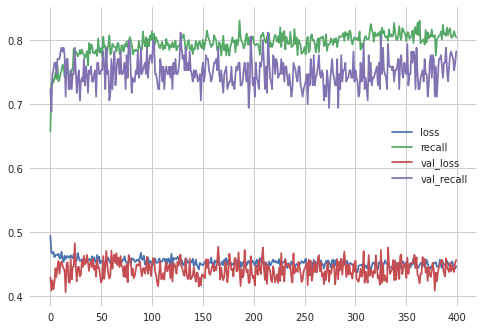

In [120]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [121]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.47865939140319824
recall:  0.7908496856689453


In [122]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 2ms/step
[[880 314]
 [ 64 242]]
              precision    recall  f1-score   support

           0       0.93      0.74      0.82      1194
           1       0.44      0.79      0.56       306

    accuracy                           0.75      1500
   macro avg       0.68      0.76      0.69      1500
weighted avg       0.83      0.75      0.77      1500



False Negative prediction decreased. Significant increase in recall.

### Add Early Stop

#### Monitor the "val_loss" as metric

In [127]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [128]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 200, callbacks = [early_stop])

Epoch 1/200
240/240 [==============================] - 1s 4ms/step - loss: 0.3324 - recall: 0.5067 - val_loss: 0.3310 - val_recall: 0.4941
Epoch 2/200
240/240 [==============================] - 1s 4ms/step - loss: 0.3356 - recall: 0.4946 - val_loss: 0.3370 - val_recall: 0.4941
Epoch 3/200
240/240 [==============================] - 1s 4ms/step - loss: 0.3378 - recall: 0.4837 - val_loss: 0.3384 - val_recall: 0.4882
Epoch 4/200
240/240 [==============================] - 1s 4ms/step - loss: 0.3402 - recall: 0.5086 - val_loss: 0.3344 - val_recall: 0.5059
Epoch 5/200
240/240 [==============================] - 1s 4ms/step - loss: 0.3368 - recall: 0.4971 - val_loss: 0.3356 - val_recall: 0.4824
Epoch 6/200
240/240 [==============================] - 1s 4ms/step - loss: 0.3323 - recall: 0.5074 - val_loss: 0.3331 - val_recall: 0.5059
Epoch 7/200
240/240 [==============================] - 1s 4ms/step - loss: 0.3388 - recall: 0.4849 - val_loss: 0.3340 - val_recall: 0.4941
Epoch 8/200
240/240 [======

Early stopping at Epoch 16/200 b/c there is not improvement in the model after epoch 16

#### Monitor the "val_recall" as metric

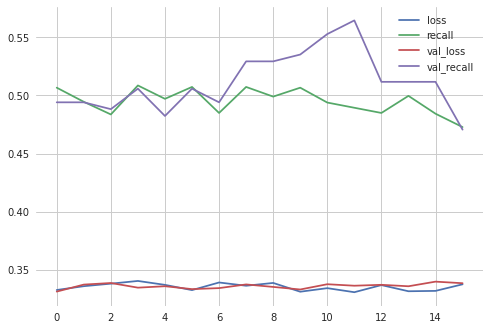

In [129]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [131]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.35541850328445435
recall:  0.49673202633857727


In [130]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 1ms/step
[[1145   49]
 [ 154  152]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1194
           1       0.76      0.50      0.60       306

    accuracy                           0.86      1500
   macro avg       0.82      0.73      0.76      1500
weighted avg       0.86      0.86      0.85      1500



No improvement with early stop, overfitting occurs after epoch 16; recall scores dropped as well asn loss scores

## GridSearchCV

In [137]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [138]:
def build_classifier(optimizer,learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate),
                       loss='binary_crossentropy',
                       metrics=['Recall'])
    return classifier

In [139]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="min",
                           verbose=1,
                           patience=15,
                           restore_best_weights=True)

In [ ]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train,class_weight=class_weights, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

# Final Model and Model Deployment

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_cancer", 'wb'))

In [ ]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=15,
                           restore_best_weights=True)

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          batch_size=32,
          epochs=200,
          verbose=1,
          callbacks=[early_stop])

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", recall)

In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
model.save('model_cancer.h5')

## Prediction

In [ ]:
single_customer = df.drop(columns=['Churn']).iloc[0]
single_customer

In [ ]:
single_customer = column_trans .transform(single_customer.values.reshape(-1, 11)))
single_customer

In [ ]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___